In [1]:
### Requirements
## numpy, sklearn, matplotlib, mne
!pip install mne

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.preprocessing import ICA

This is a sample dataset provided by MNE. 
- In this experiment, checkerboard patterns were presented to the subject into the left and right visual field, interspersed by tones to the left or right ear. The interval between the stimuli was 750 ms. Occasionally a smiley face was presented at the center of the visual field. The subject was asked to press a key with the right index finger as soon as possible after the appearance of the face.
- EEG data from a 60-channel electrode cap was acquired simultaneously with the MEG
- For first part we are using only EEG data ( along with EOG and ECG channels recorded)
- The second part has code to work with MEG data

Link to the description - https://mne.tools/stable/overview/datasets_index.html#sample

In [3]:
from mne.datasets import sample
data_path = sample.data_path()
raw_fname = str(data_path) + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
raw = mne.io.Raw(raw_fname)
raw.info

Opening raw data file C:\Users\Syed Saqib Habeeb\mne_data\MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>

# EEG

---


# **Plot the RAW data and view**  (EDITME)
Change the duration and the number of channels and browse through the data

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


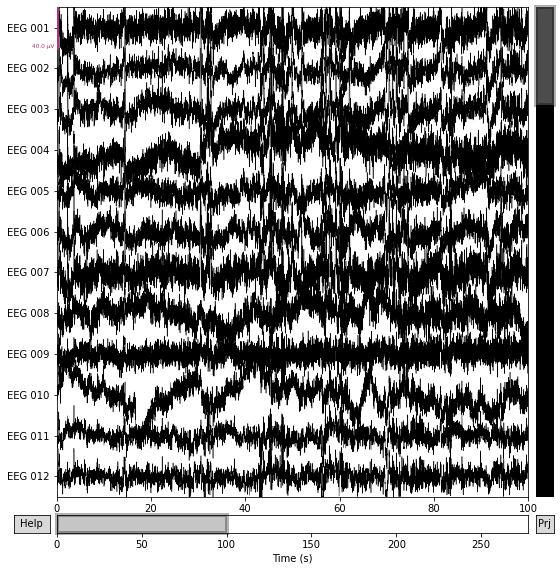

In [5]:
raw_eeg = raw.copy()
raw_eeg.pick_types(meg=False, eeg=True, eog=True, ecg=True) # Selecting EEG, EOG and ECG channels <======
x = raw_eeg.plot(duration=100,n_channels=12) # Tweak duration & number of channels <======



---


# Run ICA  - plot components and browse
Try to edit the number of components and re-run the ICA

- https://mne.tools/stable/generated/mne.preprocessing.ICA.html

In [6]:
ica_eeg = ICA(n_components=12, random_state=97) #Setup ICA <=======
ica_eeg.fit(raw_eeg) # Run ICA

Fitting ICA to data using 59 channels (please be patient, this may take a while)
Selecting by number: 12 components
Fitting ICA took 2.0s.


<ICA | raw data decomposition, method: fastica (fit in 57 iterations on 41700 samples), 12 ICA components (59 PCA components available), channel types: eeg, no sources marked for exclusion>

Creating RawArray with float64 data, n_channels=13, n_times=41700
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


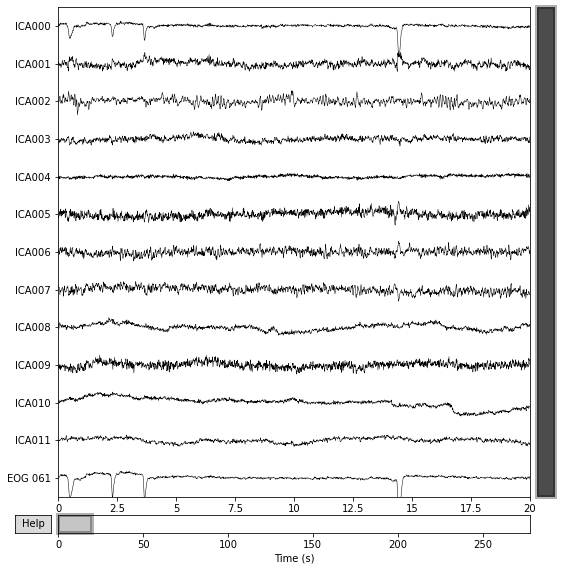

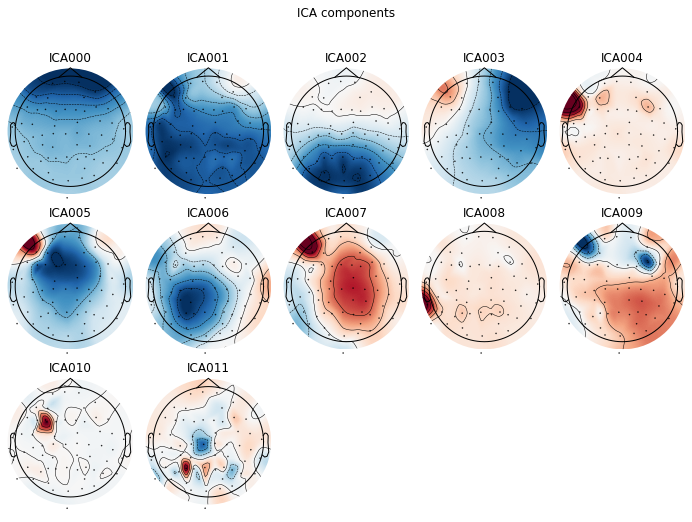

In [7]:
x = ica_eeg.plot_sources(raw_eeg) # Plot time series
x = ica_eeg.plot_components() #Plot topographies

# Drop artefactual components (EDITME)

Applying ICA to Raw instance
    Transforming to ICA space (12 components)
    Zeroing out 0 ICA components
    Projecting back using 59 PCA components


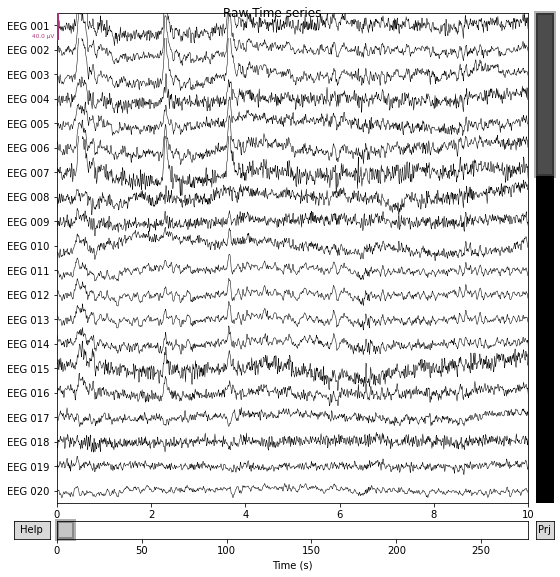

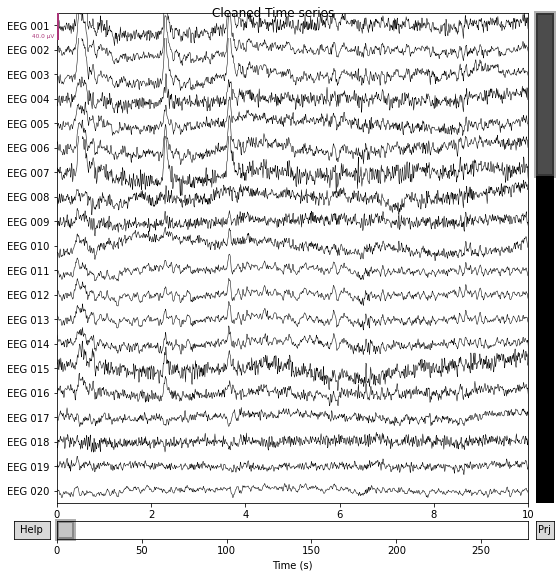

In [10]:
raw_eeg.load_data()

ica_eeg.exclude = []  # indices chosen based on various plots above <======

# ica.apply() changes the Raw object in-place, so let's make a copy first:
reconst_raw = raw_eeg.copy()
ica_eeg.apply(reconst_raw)

#Raw
raw_eeg.plot(show=False)
plt.suptitle('Raw Time series')


#Reconstruced after removing artefactual components
reconst_raw.plot(show=False)
plt.suptitle('Cleaned Time series')
plt.show()
del reconst_raw

Applying ICA to Raw instance
    Transforming to ICA space (12 components)
    Zeroing out 4 ICA components
    Projecting back using 59 PCA components


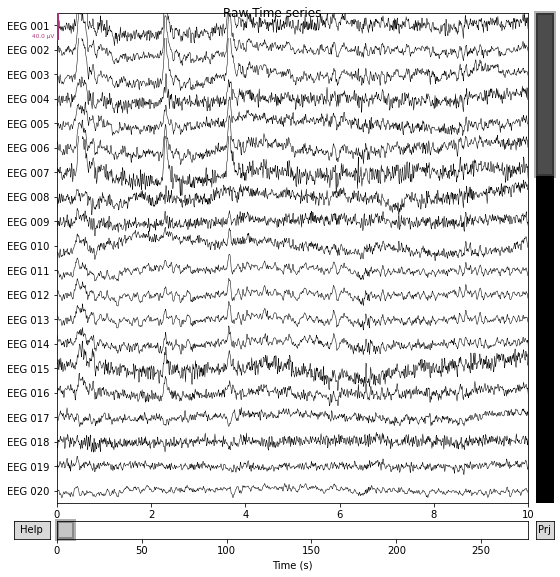

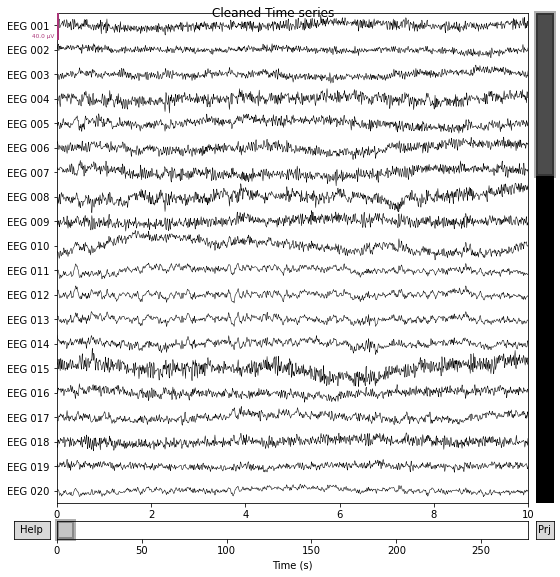

In [11]:
raw_eeg.load_data()

ica_eeg.exclude = [0,1,2,6]  # indices chosen based on various plots above <======

# ica.apply() changes the Raw object in-place, so let's make a copy first:
reconst_raw = raw_eeg.copy()
ica_eeg.apply(reconst_raw)

#Raw
raw_eeg.plot(show=False)
plt.suptitle('Raw Time series')


#Reconstruced after removing artefactual components
reconst_raw.plot(show=False)
plt.suptitle('Cleaned Time series')
plt.show()
del reconst_raw

Applying ICA to Raw instance
    Transforming to ICA space (12 components)
    Zeroing out 5 ICA components
    Projecting back using 59 PCA components


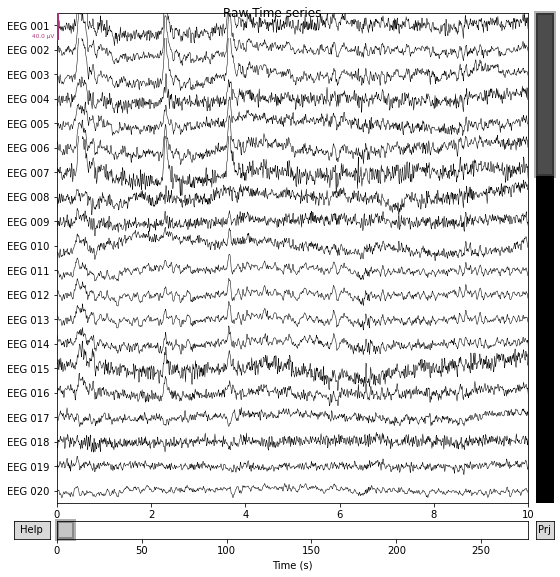

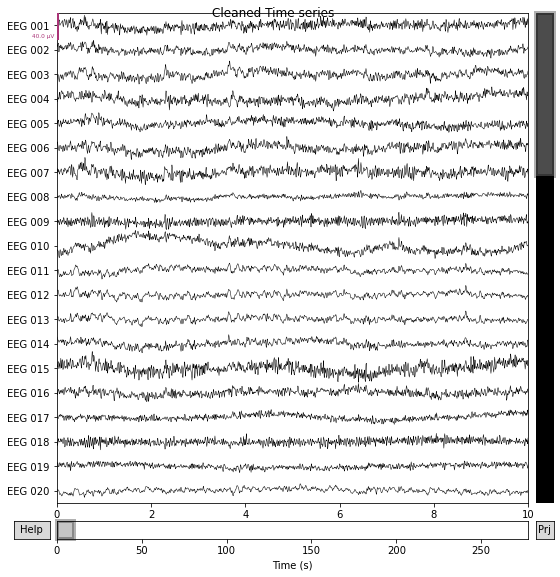

In [12]:
raw_eeg.load_data()

ica_eeg.exclude = [0,2,3,4,7]  # indices chosen based on various plots above <======

# ica.apply() changes the Raw object in-place, so let's make a copy first:
reconst_raw = raw_eeg.copy()
ica_eeg.apply(reconst_raw)

#Raw
raw_eeg.plot(show=False)
plt.suptitle('Raw Time series')


#Reconstruced after removing artefactual components
reconst_raw.plot(show=False)
plt.suptitle('Cleaned Time series')
plt.show()
del reconst_raw

Applying ICA to Raw instance
    Transforming to ICA space (12 components)
    Zeroing out 5 ICA components
    Projecting back using 59 PCA components


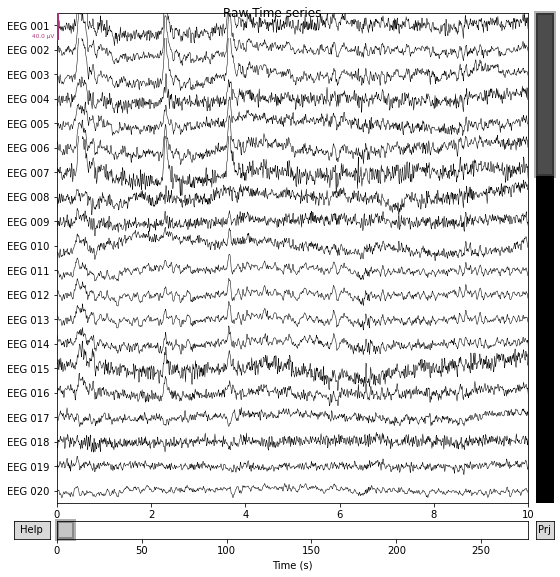

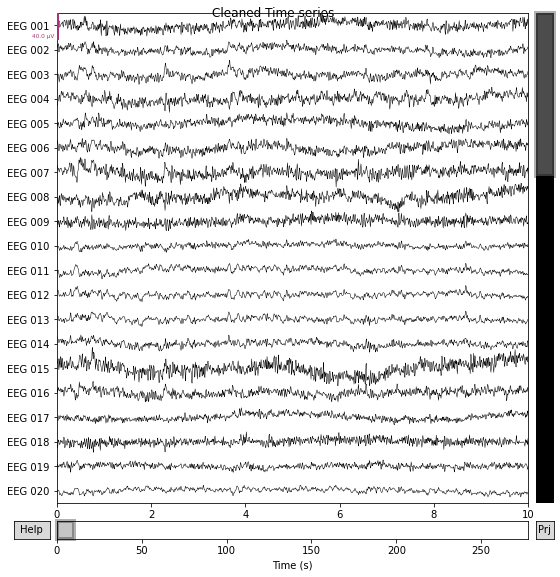

In [13]:
raw_eeg.load_data()

ica_eeg.exclude = [0,2,7,10,11]  # indices chosen based on various plots above <======

# ica.apply() changes the Raw object in-place, so let's make a copy first:
reconst_raw = raw_eeg.copy()
ica_eeg.apply(reconst_raw)

#Raw
raw_eeg.plot(show=False)
plt.suptitle('Raw Time series')


#Reconstruced after removing artefactual components
reconst_raw.plot(show=False)
plt.suptitle('Cleaned Time series')
plt.show()
del reconst_raw

We see that some noise is still present after removing the artefactual components. <br>


# MEG 
---  
# **Plot the RAW data and view**  
Change the duration and the number of channels and browse through the data

Removing projector <Projection | Average EEG reference, active : False, n_channels : 60>


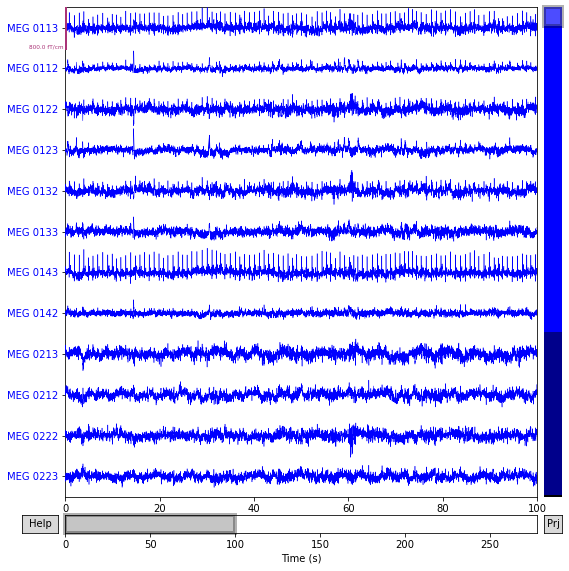

In [17]:
raw_meg = raw.copy()
raw_meg.pick_types(meg=True, eeg=False, eog=True, ecg=True) # Selecting MEG, EOG and ECG channels <======
x = raw_meg.plot(duration=100,n_channels=12) # Tweak duration & number of channels <======

In [18]:
ica_meg = ICA(n_components=12, random_state=97) #Setup ICA <=======
ica_meg.fit(raw_meg) # Run ICA

Fitting ICA to data using 305 channels (please be patient, this may take a while)
Selecting by number: 12 components
Fitting ICA took 1.9s.


<ICA | raw data decomposition, method: fastica (fit in 36 iterations on 41700 samples), 12 ICA components (305 PCA components available), channel types: mag, grad, no sources marked for exclusion>

Creating RawArray with float64 data, n_channels=13, n_times=41700
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


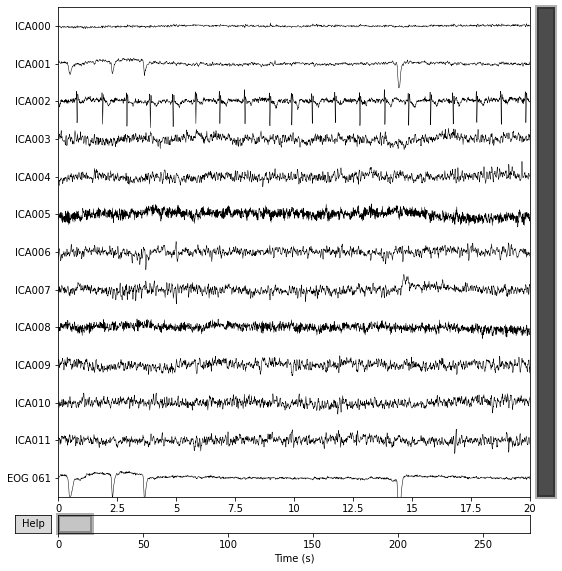

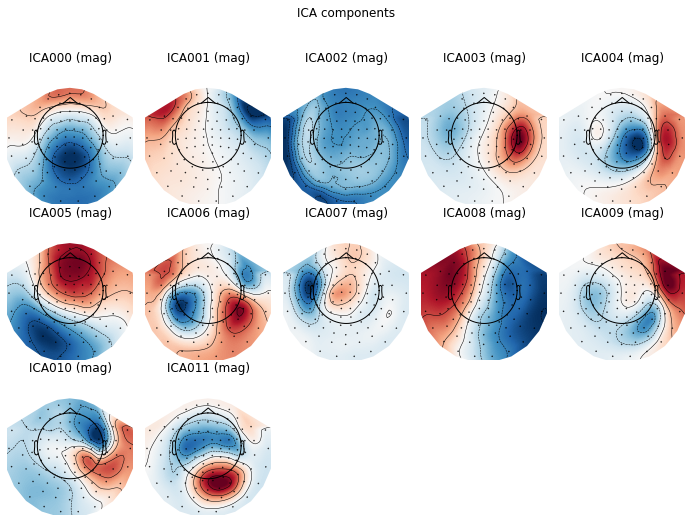

In [19]:
x = ica_meg.plot_sources(raw_meg) # Plot time series
x = ica_meg.plot_components() #Plot topographies

Reading 0 ... 41699  =      0.000 ...   277.709 secs...
Applying ICA to Raw instance
    Transforming to ICA space (12 components)
    Zeroing out 0 ICA components
    Projecting back using 305 PCA components


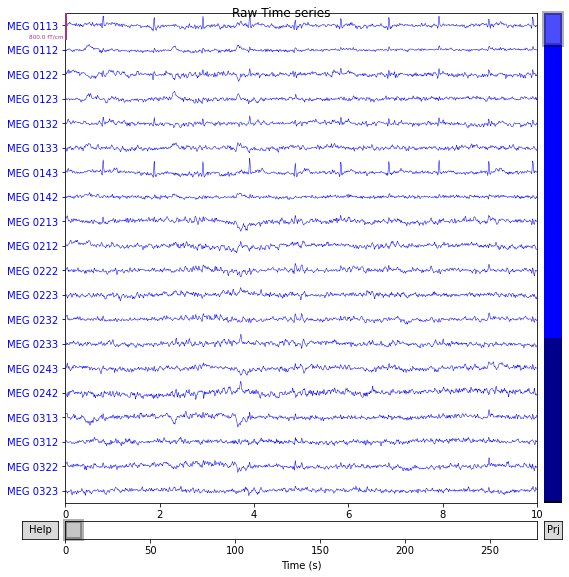

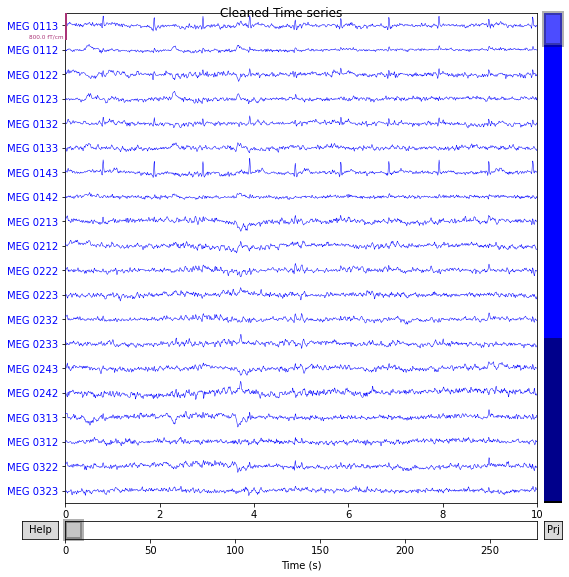

In [20]:
raw_meg.load_data()

ica_meg.exclude = []  # indices chosen based on various plots above <======

# ica.apply() changes the Raw object in-place, so let's make a copy first:
reconst_raw = raw_meg.copy()
ica_meg.apply(reconst_raw)

#Raw
raw_meg.plot(show=False)
plt.suptitle('Raw Time series')


#Reconstruced after removing artefactual components
reconst_raw.plot(show=False)
plt.suptitle('Cleaned Time series')
plt.show()
del reconst_raw

Applying ICA to Raw instance
    Transforming to ICA space (12 components)
    Zeroing out 2 ICA components
    Projecting back using 305 PCA components


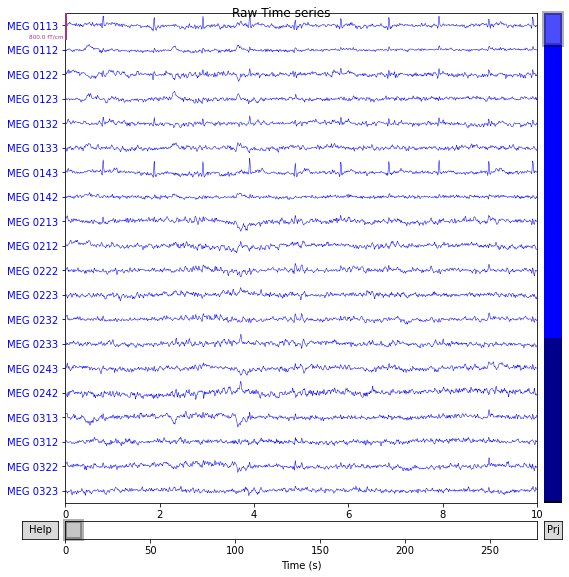

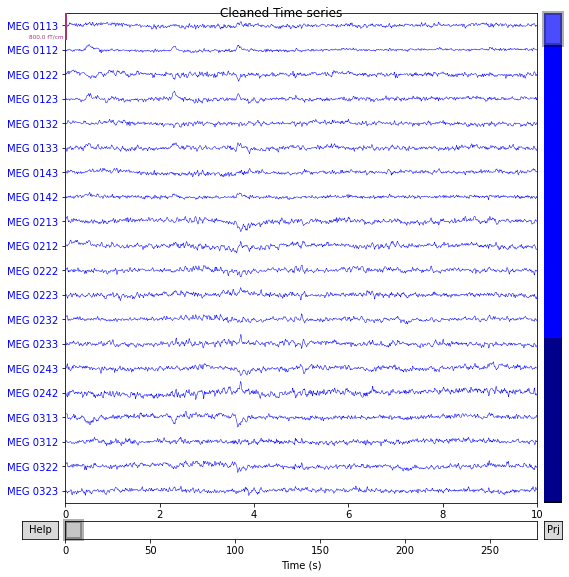

In [21]:
raw_meg.load_data()

ica_meg.exclude = [0,2]  # indices chosen based on various plots above <======

# ica.apply() changes the Raw object in-place, so let's make a copy first:
reconst_raw = raw_meg.copy()
ica_meg.apply(reconst_raw)

#Raw
raw_meg.plot(show=False)
plt.suptitle('Raw Time series')


#Reconstruced after removing artefactual components
reconst_raw.plot(show=False)
plt.suptitle('Cleaned Time series')
plt.show()
del reconst_raw

In EEG, ECG and EOG artifacts are much easier to becausee of the strong electrical signal of the heart activity but the meg is weaker so that cant be detected.<br>
<br>
For ECG, we can place a dipole in the deep structure of brain in the same direction as the dominant vector of ECG, and provide a very low amplitude souce. <br>
<br> 
For EOG, we can place a dipole positive side on cornea and negative side on retina, in presence of a high amplitude source